At first I'll import all the needed libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

Ok, now I will load given data. It's csv file, so I use read_csv.

In [2]:
df = pd.read_csv('Dane_bank_nowe.csv', sep=',')

**It is good practice to work on a copy of the data, not on the original file.** If we will edit few times original file and after 3 hours it will turn out that deleting one of the column was a mistake - working on a copy will allow us to quickly restore the column :) So..

In [3]:
df_copy = df.copy(deep = True)

### Let's see what do we have here ;)

In [4]:
df_copy.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


In [5]:
df_copy.duplicated().sum()

0

Ok, there are no duplicates in this file - that's good information ;)

There are few columns, which are not useful for further analysis:
* Unnamed: 0
* RowNumber
* CustomerId
* Surname (I assumed that surname has no impact had no effect on creditworthiness ;) )

So, goodbye columns!

In [6]:
to_drop = ['RowNumber', 'Surname', 'CustomerId', 'Unnamed: 0']
df_copy.drop(to_drop, inplace=True, axis=1)

Did it work?

In [7]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


Yup, it's ok :)

In next step I'm going to check non-numeric columns and convert data into numeric. It will make work much easier and it's necessary e.g. to make chart.

In [8]:
df_copy.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df_copy.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
d = {'France':1,'Spain':2,'Germany':3, 'Female':0, 'Male':1}
df_copy = df_copy.replace(d)

In [11]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,886607.90,1
1,608,2,0,41,1,83807.86,1,0,1,916554.56,0
2,502,1,0,42,8,159660.80,3,1,0,849781.25,1
3,699,1,0,39,1,0.00,2,0,0,1367384.50,0
4,850,2,0,43,2,125510.82,1,1,1,1504164.20,0


Much better, isn't it?

Ok, now let's see more information about data:

In [12]:
df_copy.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,1.130141e+06,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,3.078528e+05,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.914779e+05,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,8.728450e+05,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,1.160135e+06,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,1.363969e+06,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.730501e+06,1.000000


### What can we see here? 

I think I don't have to explain what mean or standard deviation is, or how to come to any conclusion looking at these data ;) 

In this step I'm looking for any nonstandard and illogical informations, which would be a message that this data needs more "cleaning". For example:
* **minimal value of age < 18** might be due to mistake. Then, we should check how many positions with age < 18 is in the data. If there are few of them - I would delete them (_all rows, not only cells_) and it's ok. But it might tourned out that we have 500/10000 positions with age in the range 13-17, because bank has in its offer account for young people. And we have no column, where this information is included. Then we would have to decide what to do with it.
* **has credit card > 1** or **has credit card = 0.6** - we have separate column with number of products, information other than 0 or 1 would be a mistake.
* **max number of products = 1872** - suspicious, right?

In the table above I don't see any illogical data. Let's move on!

/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/katarzyna/.local/lib/python3.7/site

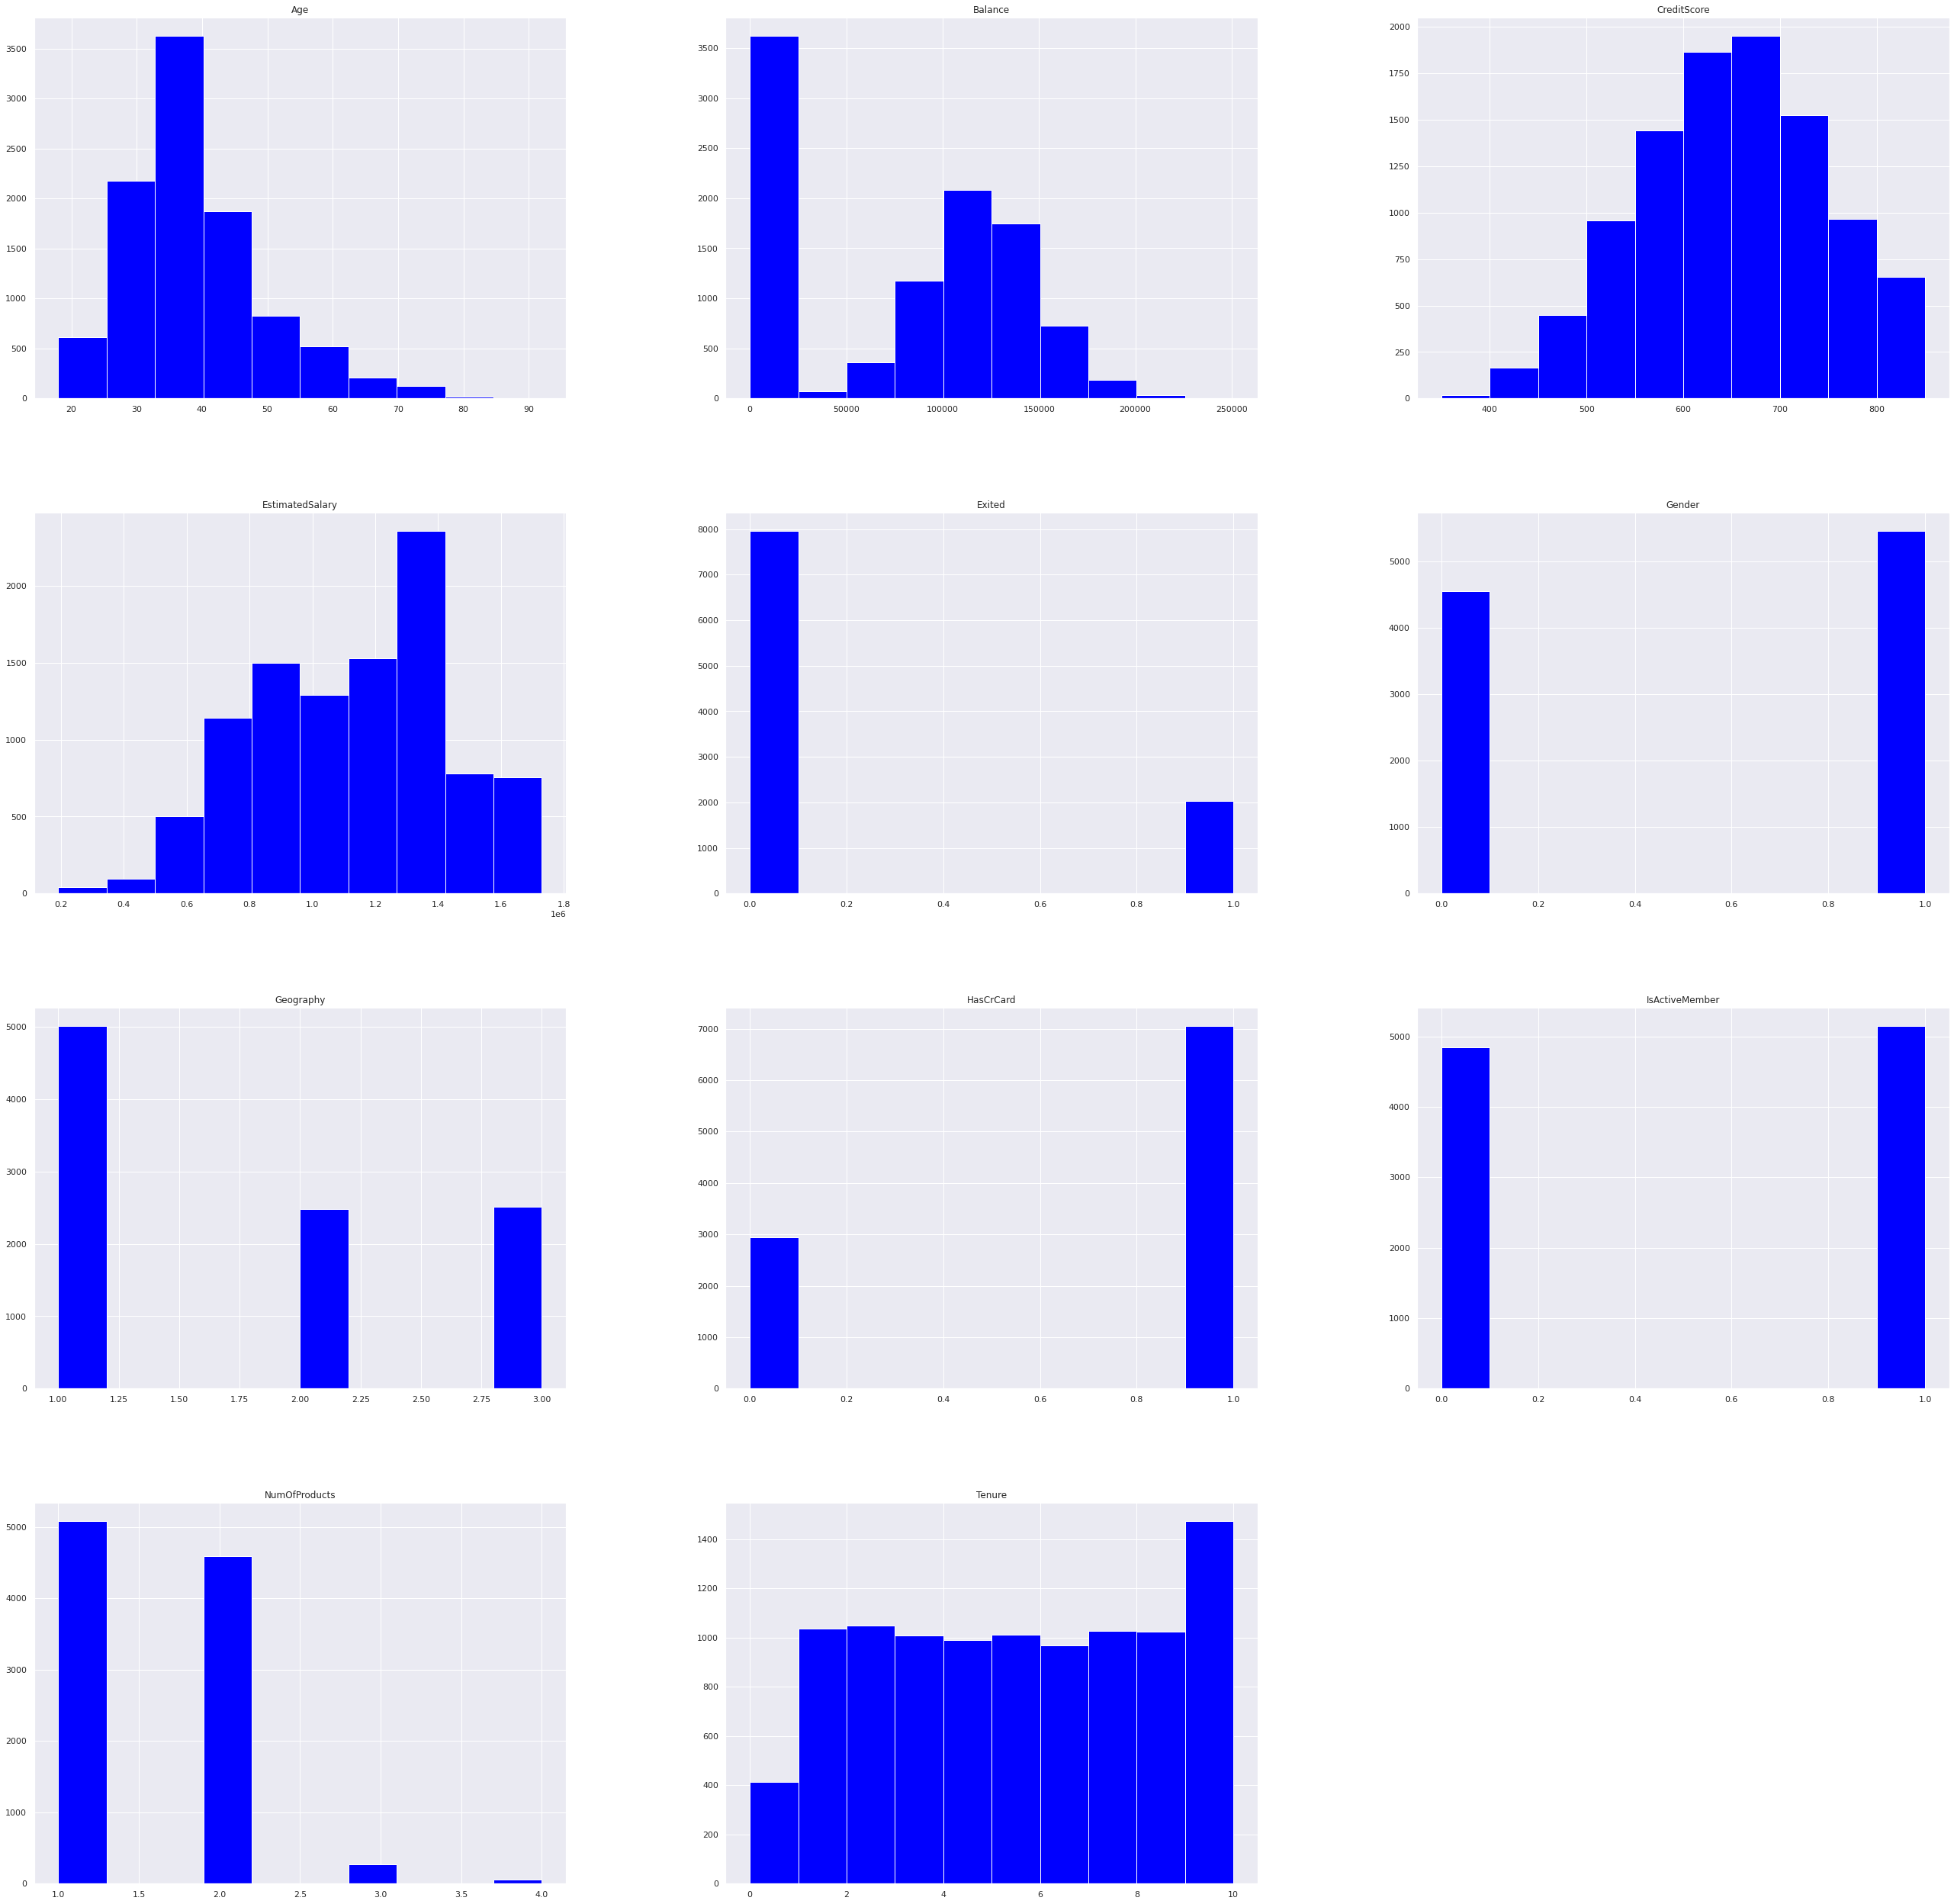

In [13]:
sns.set()
df_copy.hist(figsize=(45,45), color='blue')
plt.show()

### Above plots show us some interesting things:

* the majority of clients are in the age group ~33-40
* more than 3600 clients has no money at their account (_Balance = 0_)
* there are around 20% exited clients
* there are more male than female clients
* almost half of clients come from France
* around 70% of clients has credit card
* roughly the same number of customers use actively the account as not
* the most customers has one product, a bit less has two products - very few customers have 3 or more products

### Now it's time to check how correlation looks like:

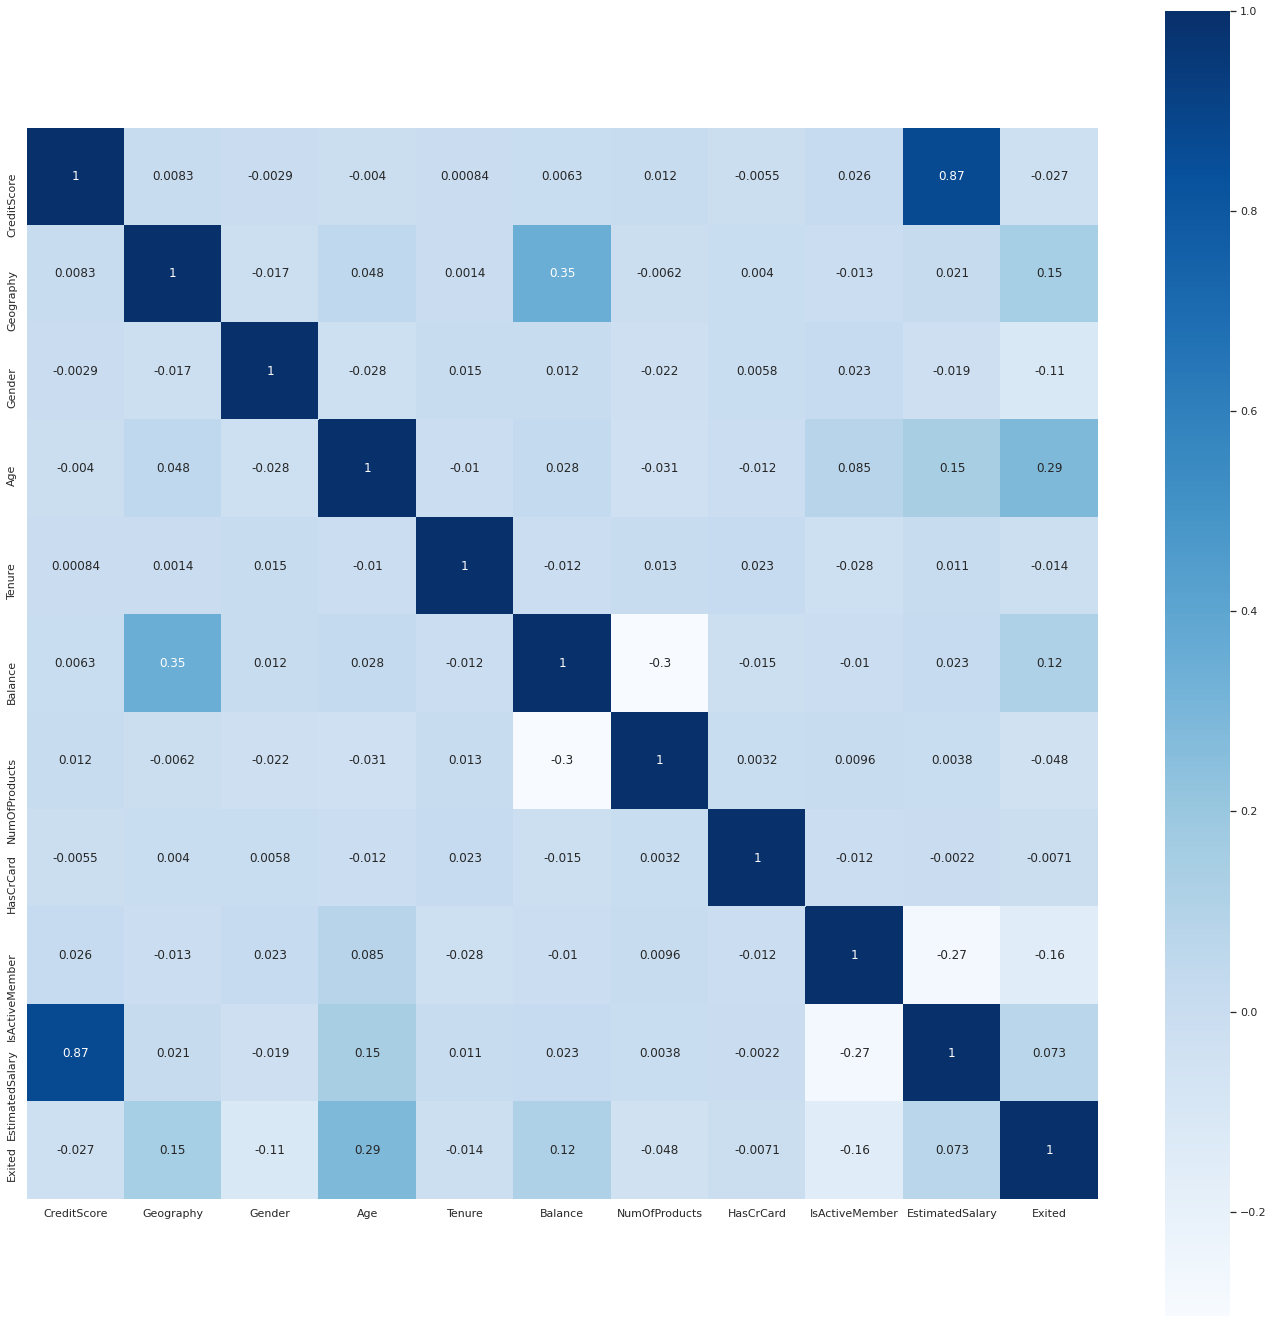

In [14]:
correlation = df_copy.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(24,24))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

### Strong correlation is between:

* estimated salary and credit score - **0.87** (it's **very strong** correlation!!!)
* geography and balance - **0.35**
* balance and number of products - **-0.3**
* exited and age - **0.29**
* estimated salary and is active member - **-0.27**

# Retention

### At first, I'm going to do analysis of retention, so I will check correlation with 'exited'.

The traits strongest correlated with 'exited' are:
    * Age (0.29)
    * IsActiveMember (-0.16)
    * Geography (0.15)
And possibly:
    * Balance (0.12)
    * Gender (-0.11)
    
Are there any correlations between them (each other)?
    * Balance & Geography (0.35) <---- I should pay attention to this creating model

## Models

Now it's a good moment to import necessery stuff :)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Logistic Regression

What logistic regression is? Below there are few fragments found on the [TechTarget website](https://searchbusinessanalytics.techtarget.com/definition/logistic-regression).

>_"Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. (...) The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data. As more relevant data comes in, the algorithm should get better at predicting classifications within data sets. Logistic regression can also play a role in data preparation activities by allowing data sets to be put into specifically predefined buckets during the extract, transform, load (ETL) process in order to stage the information for analysis."_

>_"A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables."_

>_"Logistic regression is one of the most commonly used machine learning algorithms for binary classification problems, which are problems with two class values, including predictions such as “this or that,” “yes or no” and “A or B.” "_

>_"The purpose of logistic regression is to estimate the probabilities of events, including determining a relationship between features and the probabilities of particular outcomes."_

In our model we have binary classification: we should predict if client is going to exite (1) or not (0). 
So, first model which I want to check out is logistic regression :)

### Logistic Regression - all variables
_I just want to check result, out of curiosity..._

#### At first, I should determine our X and y:

In [16]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

How does it look like?

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.00,1,1,1,886607.90
1,608,2,0,41,1,83807.86,1,0,1,916554.56
2,502,1,0,42,8,159660.80,3,1,0,849781.25
3,699,1,0,39,1,0.00,2,0,0,1367384.50
4,850,2,0,43,2,125510.82,1,1,1,1504164.20


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### So, I need to convert y to DataFrame:

In [19]:
y = pd.DataFrame(y)

How _y_ looks lika after convertion?

In [20]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


#### Now I'm going to divide up all the examples into subsets: training set and testing set. 
Usually, there is also validation set. The most popular ratios for a start are:
* 70% train, 15% val, 15% test
* 80% train, 10% val, 10% test
* 60% train, 20% val, 20% test

Training set is the most important - this is what our model learns from. However, the size of this set should not be too large. In that case, our model can be **overtrained**. This means, that model can fit well with the training data, but applied to data not encountered during learning, will give worse results. In the picture below you can see woh it works.



Testing set is a separate set of data, that the model has not dealt with during learning. Thanks to it, we can test how our model works.

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [22]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [23]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logreg_model.score(X_test, y_test)

0.6765517241379311

In [25]:
y_pred = logreg_model.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      2309
           1       0.35      0.70      0.47       591

    accuracy                           0.68      2900
   macro avg       0.62      0.69      0.62      2900
weighted avg       0.79      0.68      0.71      2900



In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.323448275862069
Mean Squared Logaritmic Error: 0.15540169898457687
Root Mean Squared Error: 0.5687251320823347


### Logistic Regression - variables stronger correlated with 'Exited' 
(remember, that one pair of variables has correlation 0.35)

In [28]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [29]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [31]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [32]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logreg_model.score(X_test, y_test)

0.2035

In [34]:
y_pred = logreg_model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



/home/katarzyna/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7965
Mean Squared Logaritmic Error: 0.3826808255858475
Root Mean Squared Error: 0.892468486838611


### Logistic Regression - variables stronger correlated with 'Exited' 
I delete 'Balance' - it has the lowest correlation with exited from other setected variables, and in this way I get rid of the correlation between variables. 

In [37]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [38]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [40]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [41]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logreg_model.score(X_test, y_test)

0.7066666666666667

In [43]:
y_pred = logreg_model.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2389
           1       0.38      0.73      0.51       611

    accuracy                           0.71      3000
   macro avg       0.65      0.72      0.65      3000
weighted avg       0.80      0.71      0.73      3000



In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.29333333333333333
Mean Squared Logaritmic Error: 0.1409328840826724
Root Mean Squared Error: 0.5416025603090641


## _To be continued.._ 